In [264]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn import metrics

In [265]:
# for warnings
import warnings
warnings.filterwarnings('ignore')

In [266]:
# import data
data = pd.read_csv('Instagram.csv',encoding='cp1252')
df_data = pd.DataFrame(data)
df_data

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920.0,2586.0,1028.0,619.0,56.0,98.0,9.0,5.0,162.0,35.0,2.0,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394.0,2727.0,1838.0,1174.0,78.0,194.0,7.0,14.0,224.0,48.0,10.0,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021.0,2085.0,1188.0,0.0,533.0,41.0,11.0,1.0,131.0,62.0,12.0,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528.0,2700.0,621.0,932.0,73.0,172.0,10.0,7.0,213.0,23.0,8.0,Here’s how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518.0,1704.0,255.0,279.0,37.0,96.0,5.0,4.0,123.0,8.0,0.0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5394.0,2275.0,2975.0,45.0,65.0,61.0,19.0,6.0,147.0,69.0,6.0,You must have heard or invested in any cryptoc...,#data #datascience #dataanalysis #dataanalytic...
96,2766.0,2541.0,116.0,51.0,9.0,40.0,10.0,4.0,114.0,11.0,6.0,Here are all the programming languages that Fa...,#programming #coding #programmer #python #deve...
97,3924.0,2244.0,1278.0,326.0,34.0,139.0,11.0,3.0,151.0,19.0,2.0,Here are some of the most popular data science...,#data #datascience #dataanalysis #dataanalytic...
98,3015.0,2034.0,771.0,115.0,41.0,52.0,11.0,4.0,92.0,9.0,2.0,Here’s how Amazon uses your data as an e-comme...,#data #datascience #dataanalysis #dataanalytic...


In [267]:
df_data.describe()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.00000,99.000000,99.000000,99.000000
mean,4644.131313,2267.808081,1738.252525,417.040404,137.242424,126.909091,6.959596,8.00000,160.333333,38.424242,11.979798
std,2291.474570,567.121422,1800.561054,511.751971,184.376118,107.821100,3.610979,7.39829,64.883884,58.915555,18.838725
min,1941.000000,1179.000000,116.000000,0.000000,9.000000,22.000000,0.000000,0.00000,72.000000,4.000000,0.000000
25%,3225.000000,1960.000000,655.000000,124.500000,36.000000,61.000000,5.000000,3.00000,116.500000,14.000000,2.000000
50%,3990.000000,2195.000000,1248.000000,249.000000,69.000000,104.000000,7.000000,6.00000,150.000000,21.000000,6.000000
75%,5172.500000,2577.500000,2222.000000,496.000000,157.500000,144.000000,9.000000,11.50000,188.500000,36.500000,11.000000
max,16062.000000,4137.000000,11817.000000,2355.000000,1115.000000,668.000000,19.000000,41.00000,416.000000,347.000000,100.000000


In [268]:
# null data
df_data.isnull().sum()

Impressions       1
From Home         1
From Hashtags     1
From Explore      1
From Other        1
Saves             1
Comments          1
Shares            1
Likes             1
Profile Visits    1
Follows           1
Caption           1
Hashtags          1
dtype: int64

In [269]:
# drop null data
df_data.dropna(inplace=True)

In [270]:
# have a look at the columns to understand the data type 
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Impressions     99 non-null     float64
 1   From Home       99 non-null     float64
 2   From Hashtags   99 non-null     float64
 3   From Explore    99 non-null     float64
 4   From Other      99 non-null     float64
 5   Saves           99 non-null     float64
 6   Comments        99 non-null     float64
 7   Shares          99 non-null     float64
 8   Likes           99 non-null     float64
 9   Profile Visits  99 non-null     float64
 10  Follows         99 non-null     float64
 11  Caption         99 non-null     object 
 12  Hashtags        99 non-null     object 
dtypes: float64(11), object(2)
memory usage: 10.8+ KB


# Analyzing Instagram Reach

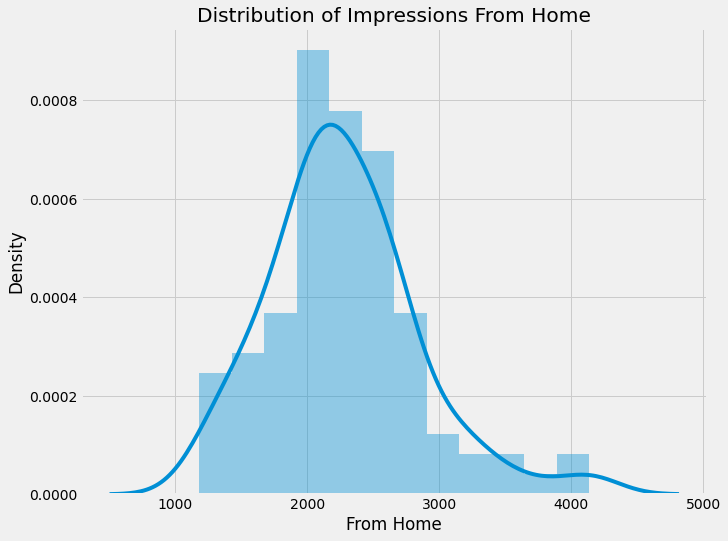

In [271]:
plt.figure(figsize=(10, 8)) # for size of chart
plt.style.use('fivethirtyeight') # style
plt.title("Distribution of Impressions From Home") 
sns.distplot(df_data['From Home']) # chart
plt.show()

shows how much my posts reach my followers 

I can say it’s hard to reach all my followers daily

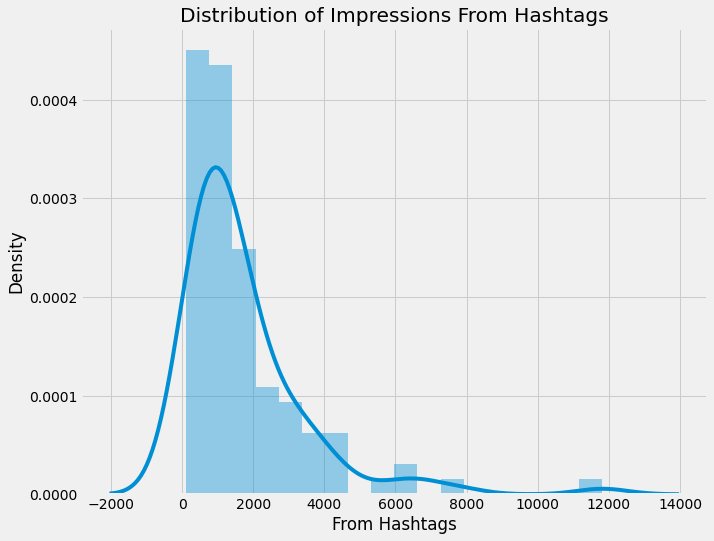

In [272]:
plt.figure(figsize=(10, 8)) # for size of chart
plt.style.use('fivethirtyeight') # style
plt.title("Distribution of Impressions From Hashtags") 
sns.distplot(df_data['From Hashtags']) # chart
plt.show()

shows that not all posts can be reached using hashtags, but many new users can be reached from hashtags.

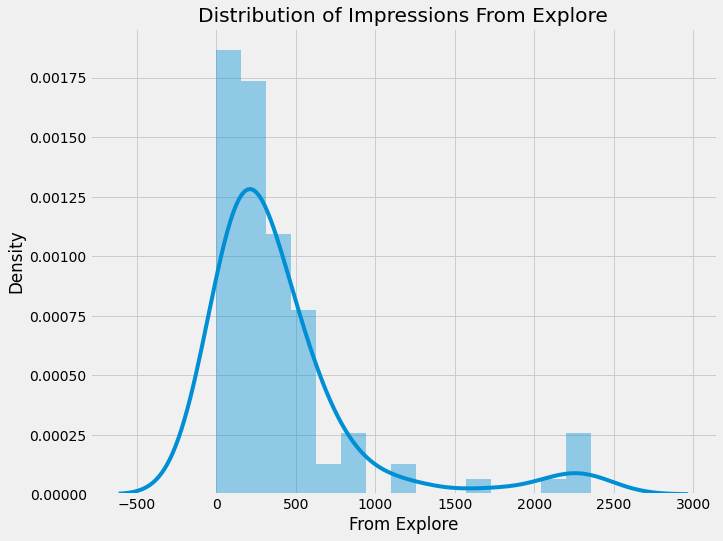

In [273]:
plt.figure(figsize=(10, 8)) # for size of chart
plt.style.use('fivethirtyeight') # style
plt.title("Distribution of Impressions From Explore") 
sns.distplot(df_data['From Explore']) # chart
plt.show()

I can say that Instagram does not recommend our posts much to the users. Some posts have received a good reach from the explore section, but it’s still very low compared to the reach I receive from hashtags.

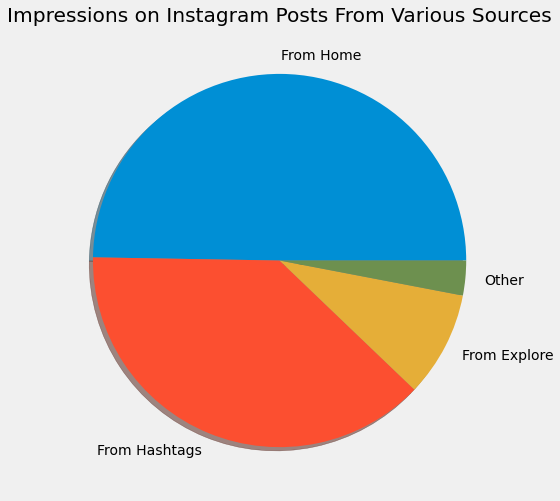

In [274]:
#percentage of impressions I get from various sources on Instagram
home = df_data["From Home"].sum()
hashtags = df_data["From Hashtags"].sum()
explore = df_data["From Explore"].sum()
other = df_data["From Other"].sum()

labels = ['From Home','From Hashtags','From Explore','Other']
values = [home, hashtags, explore, other]

plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels,data=df_data,shadow=True)
plt.title('Impressions on Instagram Posts From Various Sources')
plt.show()

relationship between the number of likes and the number of impressions on my Instagram posts

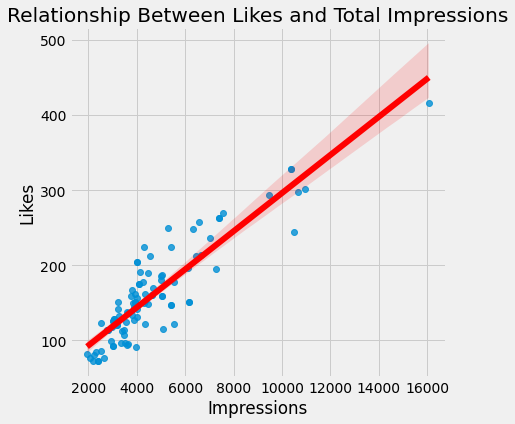

In [275]:
plt.figure(figsize=(6, 6))
sns.regplot(x="Impressions", y="Likes",scatter=True,line_kws={'color':'red'}, data = df_data)
plt.title('Relationship Between Likes and Total Impressions')
plt.show()

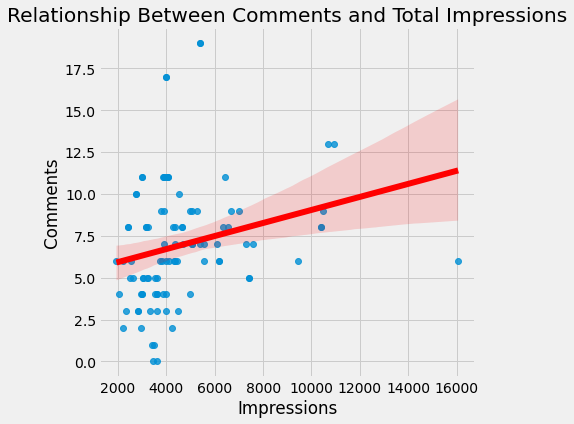

In [276]:
plt.figure(figsize=(6, 6))
sns.regplot(x="Impressions", y="Comments",scatter=True,line_kws={'color':'red'}, data = df_data)
plt.title('Relationship Between Comments and Total Impressions')
plt.show()

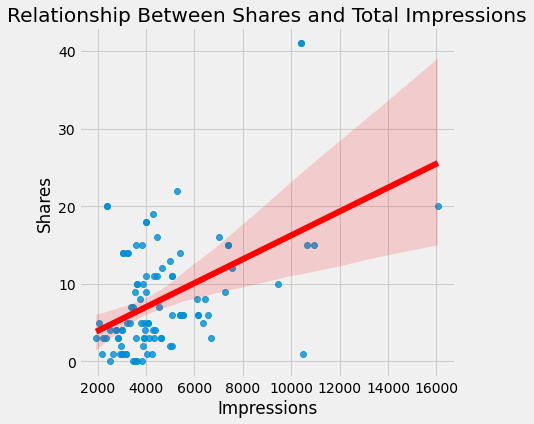

In [277]:
plt.figure(figsize=(6, 6))
sns.regplot(x="Impressions", y="Shares",scatter=True,line_kws={'color':'red'}, data = df_data)
plt.title('Relationship Between Shares and Total Impressions')
plt.show()

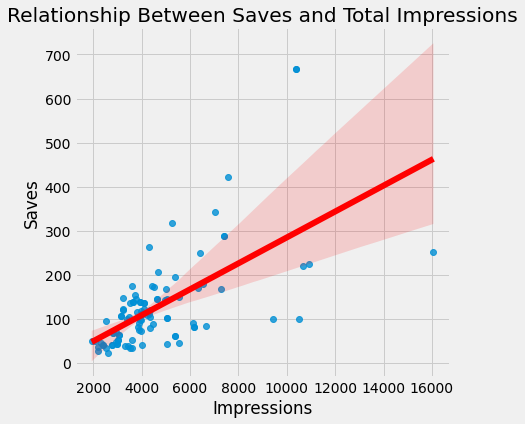

In [278]:
plt.figure(figsize=(6, 6))
sns.regplot(x="Impressions", y="Saves",scatter=True,line_kws={'color':'red'}, data = df_data)
plt.title('Relationship Between Saves and Total Impressions')
plt.show()

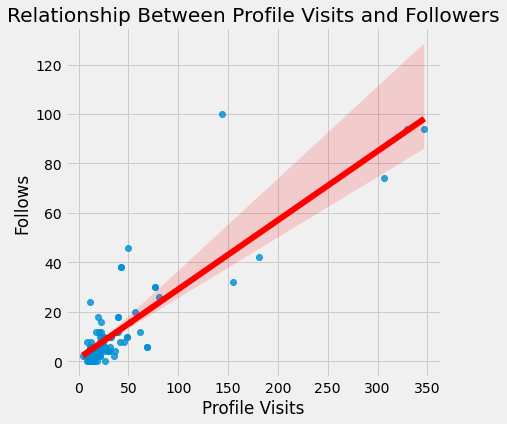

In [279]:
plt.figure(figsize=(6, 6))
sns.regplot(x="Profile Visits", y="Follows",scatter=True,line_kws={'color':'red'}, data = df_data)
plt.title('Relationship Between Profile Visits and Followers')
plt.show()

In [280]:
corrolation = df_data.corr()
print(correlation["Impressions"].sort_values(ascending=False))

Impressions       1.000000
Likes             0.896277
From Hashtags     0.892682
Follows           0.804064
Profile Visits    0.774393
Saves             0.625600
From Home         0.603378
From Explore      0.498389
Shares            0.476617
From Other        0.429227
Comments          0.247201
Name: Impressions, dtype: float64


In [281]:
# split the data into training and test sets before training the model
x = np.array(df_data[['Likes', 'Saves', 'Comments', 'Shares', 
                   'Profile Visits', 'Follows']])
y = np.array(df_data["Impressions"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.2, 
                                                random_state=42)

# Modeling

In [282]:
# we can train a machine learning model to predict the reach of an Instagram post
model = PassiveAggressiveRegressor()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

In [283]:
print(f'MSE : {metrics.mean_squared_error(ytest, ypred)}',
     f'MAE : {metrics.mean_absolute_error(ytest, ypred)}',
     f'R2Score : {metrics.r2_score(ytest, ypred)}',
     sep='\n')

MSE : 678786.9202824596
MAE : 751.2616791994606
R2Score : 0.9314222004406827
